# Project: TMDb Movie Data Analysis

**Created: April 21, 2020** |
**Last Updated: April 21, 2020** |
**By: Kolin Schunck**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#rq1">RQ #1: Profit</a></li>
    <li><a href="#rq2">RQ #2: Genres</a></li>
    <li><a href="#rq3">RQ #3: Ratings</a></li>
    <li><a href="#rq4">RQ #4: Correlations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **The Dataset**: The dataset contains 10,000 movies from "The Movie Database" (TMDb). The data includes variables about revenue, budget, user rating, popularity, to name a few. The dataset was downloaded from the following source: https://www.kaggle.com/tmdb/tmdb-movie-metadata/home.

> **Research Questions**: The research questions are clustered into four main fields, namely: (1) Profit, (2) Genres, (3) Ratings, and (5) Correlations. <ul></ul><li>**Topic 1: Profit:**</li> <ul>RQ1.1: How did the profit develop over-time?</ul> <ul>RQ1.2: Which are the top 3 movies in terms of profitability?</ul> <ul>RQ1.3: Which are the top 3 movies in terms of financial loss?</ul> <ul>RQ1.4: Which are the top 3 movies with the best budget/profit share?</ul> <ul></ul><li>**Topic 2: Genres:**</li> <ul>RQ2.1: Which Genres are most successful?</ul><ul>RQ2.2: What are features that make a movie succesful?</ul> <ul></ul><li>**Topic 3: Ratings:**</li> <ul>RQ3.1: What is the distribution of average ratings?</ul> <ul>RQ3.2: What is the distribution of average ratings per year?</ul> <ul>RQ3.3: What is the relationship between specific features (popularity) and movie ratings?</ul> <ul>RQ3.4: Which are the top 15 highest rated movies?</ul> <ul></ul><li>**Topic 4: Correlations:**</li> <ul>RQ4.1: What is the correlation between Budget and Revenue?</ul> <ul>RQ4.2: What is the correlation between Budget and Profit?</ul> <ul>RQ4.3: What is the correlation between Popularity and Profit?</ul> <ul>RQ4.4: What is the correlation between Length and Profit?</ul> <ul>RQ4.5: What is the correlation between Popularity and Average Votes?</ul> <ul>RQ4.6: What is the correlation between Budget and Popularity?</ul> <ul>RQ4.7: What is the correlation between Budget and Average Votes?</ul> <ul>RQ4.8: What is the correlation between Revenue and Popularity?</ul> <ul>RQ4.9: What is the correlation between Revenue and Average Votes?</ul> <ul>RQ4.10: What are the correlations across multiple variables using Seaborn's pairplot?</ul>



In [1073]:
# Importing files; loading necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import operator
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# this makes sure all the data visualisations are plotted in the notebook and not in a seperate window
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### Reading the data

In [1074]:
# Load and read the dataset
df = pd.read_csv('tmdb-movies.csv')

# Having a look at the first 5 rows of the dataset with the provided columns intact
df.head(5)

# The first 5 rows from the dataset are displayed 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Printing the Data's data type and dimensions¶

In [1075]:
print(df.shape)

(10866, 21)


### Printing Data columns

In [1076]:
# names of the table columns
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


### Remove unsused columns not relevant to answer the research questions

In [1077]:
# creating a list of columns to be deleted
del_col=[ 'id', 'imdb_id', 'homepage', 'keywords', 'overview']

# deleting the columns
df= df.drop(del_col,1)

# previewing the new dataset of the first five columns
df.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

In [1078]:
# Inspecting the data types and looking for instances of missing or possibly errant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   tagline               8042 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [1079]:
# looking for rows where budget equals 0
df.query('budget == 0')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,The man behind the myth,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A serial killer who can see your future, a psy...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,NaN,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,NaN,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


### Removing 0's from budget and the revenue columns

In [1080]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

# this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

# Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3854 no.of movies.


### Changing format of budget and revenue columns

In [1081]:
# checking the current format
# printing the data type of the data set
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
tagline                  object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [1082]:
change_type=['budget', 'revenue']
# changing data type
df[change_type]=df[change_type].applymap(np.int64)
# printing the changed information
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
tagline                  object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Removing columns with no casted actors and genres & Changing runtime columns that contain '0'

In [1083]:
# removing nan values from cast column, keeping only movies, that has casted actors
df = df[df["cast"].isnull() == False]
df = df[df["genres"].isnull() == False]

# replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

### Removing duplicates in rows

In [1084]:
# the number of movies we still have in the dataset
rows, col = df.shape
# We need to reduce the count of row by one
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 3850 total entries of movies and 16 no.of columns in it.


In [1085]:
# Removing duplicates
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 3849 total entries of movies and 16 no.of columns in it.


### Change date format in the table

In [1086]:
df.release_date = pd.to_datetime(df['release_date'])

In [1087]:
# printing the changed dataset
df.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### Descriptive Statistics
> In this section basic descriptive statistics are being presented for each column from the dataset, which is for informational purposes only. 

In [1088]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192661,3.724027e+07,1.077897e+08,109.228831,528.252727,6.168597,2001.260000,4.428320e+07,1.371986e+08
std,1.475527,4.221487e+07,1.766015e+08,19.924053,880.258758,0.794616,11.284699,4.481243e+07,2.161832e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463201,1.000000e+07,1.363273e+07,95.250000,71.000000,5.700000,1995.000000,1.314346e+07,1.841498e+07
50%,0.798343,2.400000e+07,4.488472e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,5.000000e+07,1.242969e+08,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### General pre-inquiries - the Histogram

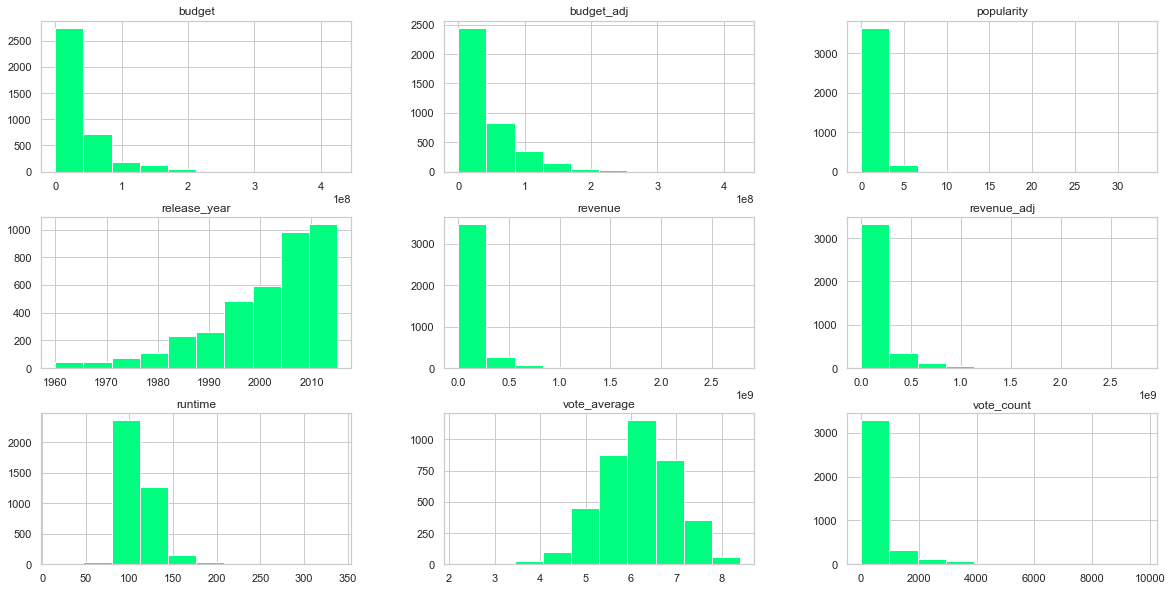

In [1089]:
df.hist(figsize=(20,10), color = '#00FF80')
plt.show()

> The histogram provides us with a first visual impression of an approximate representation of the distribution of the data in our dataset. For example: We can see that the average vote must be around 6.x. Further, we see that the number of movies per year increased by release date.

<a id='rq1'></a>
### Research Topic I : Profit

> **RQ1.1:** How did the profit develop over-time?

In [1090]:
# we need to insert a column for the profit/loss value of each movie and calculate the column
df.insert(3, 'profit_loss', df['revenue'] - df['budget'])

In [1091]:
# double-check if new column was inserted
df.head(3)

,popularity,budget,revenue,profit_loss,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


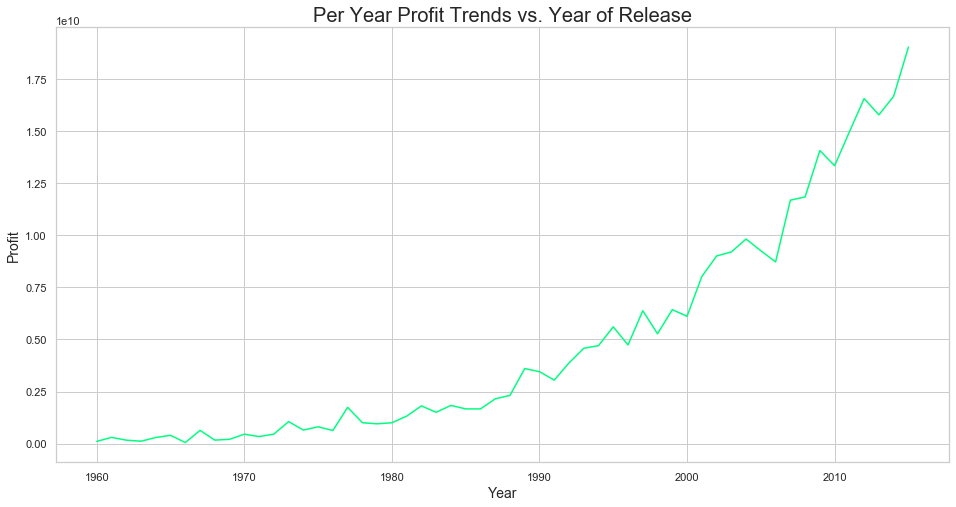

In [1092]:
# now we can visualize the profit over time, using a line chart

profits_year = df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = '#00FF80')
plt.title('Per Year Profit Trends vs. Year of Release', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Profit', fontsize = 14)
plt.show()

> The chart provides us with insights on how the profit over-time developed. The profit developed very nicely with strong growth, especially starting in 1990 going forward.

> **RQ1.2:** Which are the top 3 movies in terms of profitability?

In [1093]:
# we first need to calculate the average of profit_loss column, here we use describe to get an overall overview
df.describe()

,popularity,budget,revenue,profit_loss,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192661,3.724027e+07,1.077897e+08,7.054939e+07,109.228831,528.252727,6.168597,2001.260000,4.428320e+07,1.371986e+08
std,1.475527,4.221487e+07,1.766015e+08,1.506830e+08,19.924053,880.258758,0.794616,11.284699,4.481243e+07,2.161832e+08
min,0.001117,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463201,1.000000e+07,1.363273e+07,-1.311884e+06,95.250000,71.000000,5.700000,1995.000000,1.314346e+07,1.841498e+07
50%,0.798343,2.400000e+07,4.488472e+07,2.008885e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,5.000000e+07,1.242969e+08,8.191634e+07,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [1094]:
# we now know that the mean profit_loss is 70,549,390. 
# we now create a list of columns that we would like to display
col = ['original_title', 'cast', 'director', 'budget', 'revenue', 'profit_loss']

# we now use a query function to only show records of movies that show a profit of more than the previously
# calculated mean: 71,000,000
# we include a sort function to make sure that the records are sorte according to profit_loss column
profit_data = df.query('profit_loss>71000000')[col].sort_values('profit_loss', ascending = False)
profit_data.head(3)

,original_title,cast,director,budget,revenue,profit_loss
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,237000000,2781505847,2544505847
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,200000000,2068178225,1868178225
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,200000000,1845034188,1645034188


> The top three movies by profitability are: Avatar, Star Wars: The Fore Awakens and Titanic

In [1095]:
# counting the number of movies who fit in the profit definition
len(profit_data)

1062

> **RQ1.3:** Which are the top 3 movies in terms of financial loss?

In [1096]:
# we now use a query function to only show records of movies that are the least profitable
# show a loss of more than the previously calculated min 25%: -1,311,884
# we include a sort function to make sure that the records are sorte according to profit_loss column
loss_data = df.query('profit_loss<-1311884')[col].sort_values('profit_loss', ascending = True)
loss_data.head(3)

,original_title,cast,director,budget,revenue,profit_loss
2244,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,425000000,11087569,-413912431
5508,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,255000000,89289910,-165710090
7031,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,145000000,25819961,-119180039


> The movies with the biggest loss are: The Warrior's Way, The Lone Ranger and The Alamo.

In [1097]:
# counting the number of movies who fit in the loss definition
len(loss_data)

963

> **RQ1.4:** Which are the top 3 movies with the best budget/profit share?

In [1098]:
# we already know that the mean profit_loss is 70,549,390. 
# we now use a query function to only show records of movies that show a profit of more than the previously
# calculated mean: 71,000,000
# we include a sort function to make sure that the records are sorted according to budget column
# here: most expensive movie which is above average profitable
expensive_data = df.query('profit_loss>71000000')[col].sort_values('budget', ascending = False)
expensive_data.head(3)

,original_title,cast,director,budget,revenue,profit_loss
3375,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,380000000,1021683000,641683000
7387,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,300000000,961000000,661000000
14,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,280000000,1405035767,1125035767


> Our analysis shows us that Pirates or the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, and Avengers: Age of Ultron have a very good budget / profit share, ranked by movies with a high budget

In [1099]:
# we already know that the mean profit_loss is 70,549,390. 
# we now use a query function to only show records of movies that show a profit of more than the previously
# calculated mean: 71,000,000
# we include a sort function to make sure that the records are sorted according to budget column
# here: least expensive movie which is above average profitable
cheap_data = df.query('profit_loss>71000000')[col].sort_values('budget', ascending = True)
cheap_data.head(3)

,original_title,cast,director,budget,revenue,profit_loss
10495,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,115103979,115103866
7447,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,15000,193355800,193340800
2449,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,25000,248000000,247975000


> Our analysis shows us that The Karate Kid, Part II, Paranormal Activity, and The Blair Witch Project have a very good budget / profit share, ranked by movies with a low budgets

<a id='rq2'></a>
### Research Topic II: Genres

> **RQ2.1:** Which Genres are most successful?

In [1100]:
# before calculating the most successful genres, we need to clean the data to only those movies who have earned
# more than 71,000,000
# we create a list of columns that are required and view our newly created list
profit_gen = ['original_title', 'cast', 'director', 'genres', 'budget', 'revenue', 'runtime', 'production_companies']
profit_df = df.query('profit_loss>71000000')[profit_gen]
profit_df.head(3)


,original_title,cast,director,genres,budget,revenue,runtime,production_companies
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,150000000,378436354,120,Village Roadshow Pictures|Kennedy Miller Produ...
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,110000000,295238201,119,Summit Entertainment|Mandeville Films|Red Wago...


In [1101]:
# function to take any column as an argument
def calc_count(column):
    # take a column and separate the string by below '|'
    gendat = profit_df[column].str.cat(sep = '|')
    
    # pandas series and storing values separately, following: sort in descending order
    gendat = pd.Series(gendat.split('|'))
    count = gendat.value_counts(ascending = False)
    
    return count

In [1102]:
# store the returned value
count = calc_count('genres')
# print the top 5 values
count.head()

Comedy       384
Action       382
Drama        365
Adventure    321
Thriller     309
dtype: int64

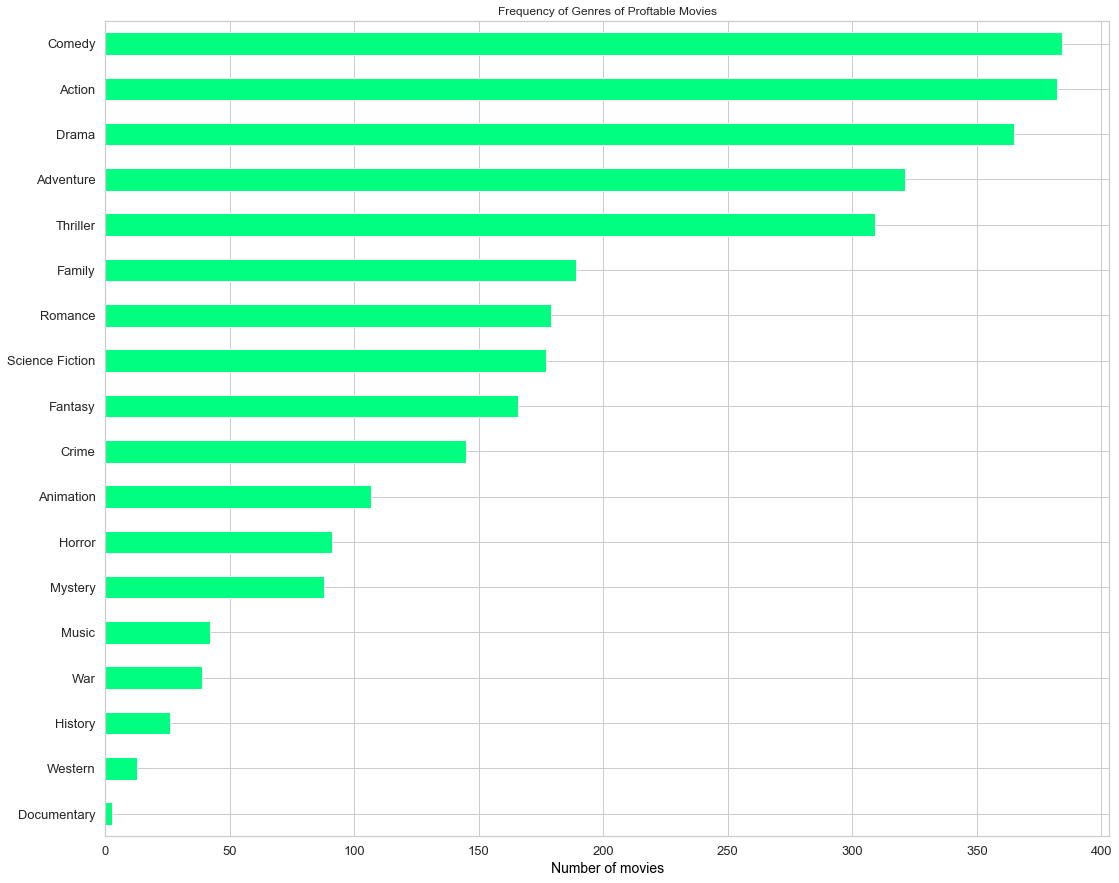

In [1103]:
# plotting values in descending order from top to bottom
count.sort_values(ascending = True, inplace = True)
# plot and formatting
genl = count.plot.barh(color = '#00FF80', fontsize = 13)
genl.set(title = 'Frequency of Genres of Proftable Movies')
genl.set_xlabel('Number of movies', color = 'black', fontsize = '14')
genl.figure.set_size_inches(18,15)
plt.show()

> Our analysis shows us the most successful genres by movies which are above average profitable. The top three most successful genres are: Comedy, Action and Drama.

> **RQ2.2:** What are features that make a movie succesful?

In [1104]:
# Identify the top actors
# variable to return stored value
count = calculate_count('cast')

# print the top 5 values
count.head()

Tom Cruise            26
Brad Pitt             20
Tom Hanks             20
Sylvester Stallone    20
Cameron Diaz          18
dtype: int64

> The analysis provides us with the actors by which a movie is successful, namely: Tom Cruise, Brad Pitt and Tom Hanks.

In [1105]:
# Identify the top directors
# variable to return stored value
count = calculate_count('director')

# print the top 5 values
count.head()

Steven Spielberg      22
Robert Zemeckis       12
Ridley Scott          10
Tim Burton             9
M. Night Shyamalan     8
dtype: int64

> The analysis provides us with the directors by which a movie is successful, namely: Steven Spielberg, Robert Zemeckis, and Ridley Scott

In [1106]:
# Calculate the avg budget of succesful movie
# variable to return stored value
profit_avg_bud = profit_df['budget'].mean()
print('The average budget of a successful movie is ${0:.2f}'.format(profit_avg_bud))

The average budget of a successful movie is $66548839.24


In [1107]:
# Calculate the avg runtime of a succesful movie
# variable to return stored value
profit_avg_run = profit_df['runtime'].mean()
print('The average runtime of a succesful movie is {0:.1f}'.format(profit_avg_run))

The average runtime of a succesful movie is 114.7


In [1108]:
# Avg revenue of a successful movie
# variable to return stored value
provit_avg_run = profit_df['revenue'].mean()
print('The average revenue of a successful movie is ${0:.1f}'.format(provit_avg_run))

The average revenue of a successful movie is $296063929.0


<a id='rq3'></a>
### Research Topic III: Ratings

> **RQ3.1:** What is the distribution of average ratings?

In [1109]:
# description of vote average
df['vote_average'].describe()

count    3850.000000
mean        6.168597
std         0.794616
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

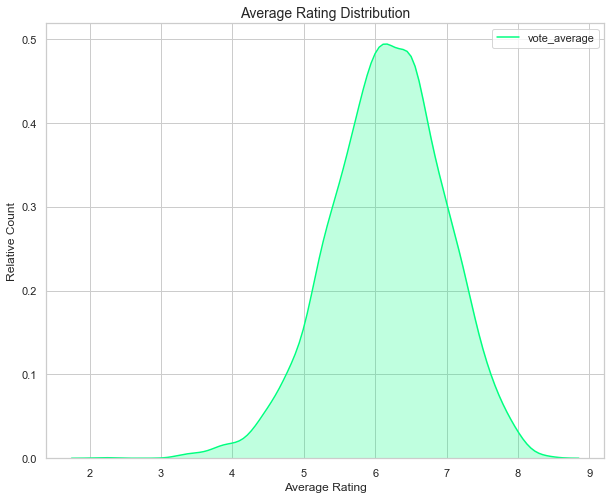

In [1110]:
# creating a density plot
plt.figure(figsize=(10,8))
sns.kdeplot(df['vote_average'], shade = True, color = '#00FF80')
plt.title('Average Rating Distribution', fontsize = '14')
plt.xlabel('Average Rating', fontsize = '12')
plt.ylabel('Relative Count', fontsize = '12')
plt.show()

> The distribution provides us with insights on the average rating across all movies, which is similar to the histogram we used at the beginning of the exploratory section

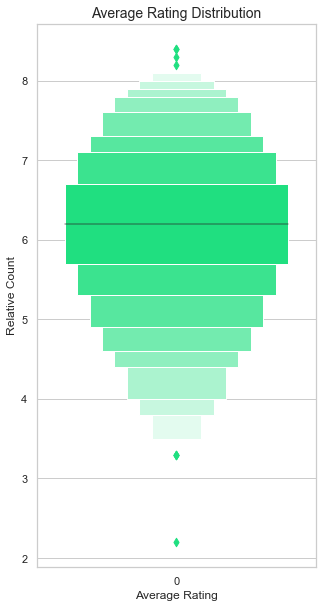

In [1111]:
# creating a box plot
plt.figure(figsize=(5,10))
sns.boxenplot(scale = 'linear', data=df['vote_average'], color = '#00FF80')
plt.title('Average Rating Distribution', fontsize = '14')
plt.xlabel('Average Rating', fontsize = '12')
plt.ylabel('Relative Count', fontsize = '12')
plt.show()

> The analysis confirms our preceding distribution chart, that the average rating across all movies is 6.2

> **RQ3.2:** What is the distribution of average ratings per year?

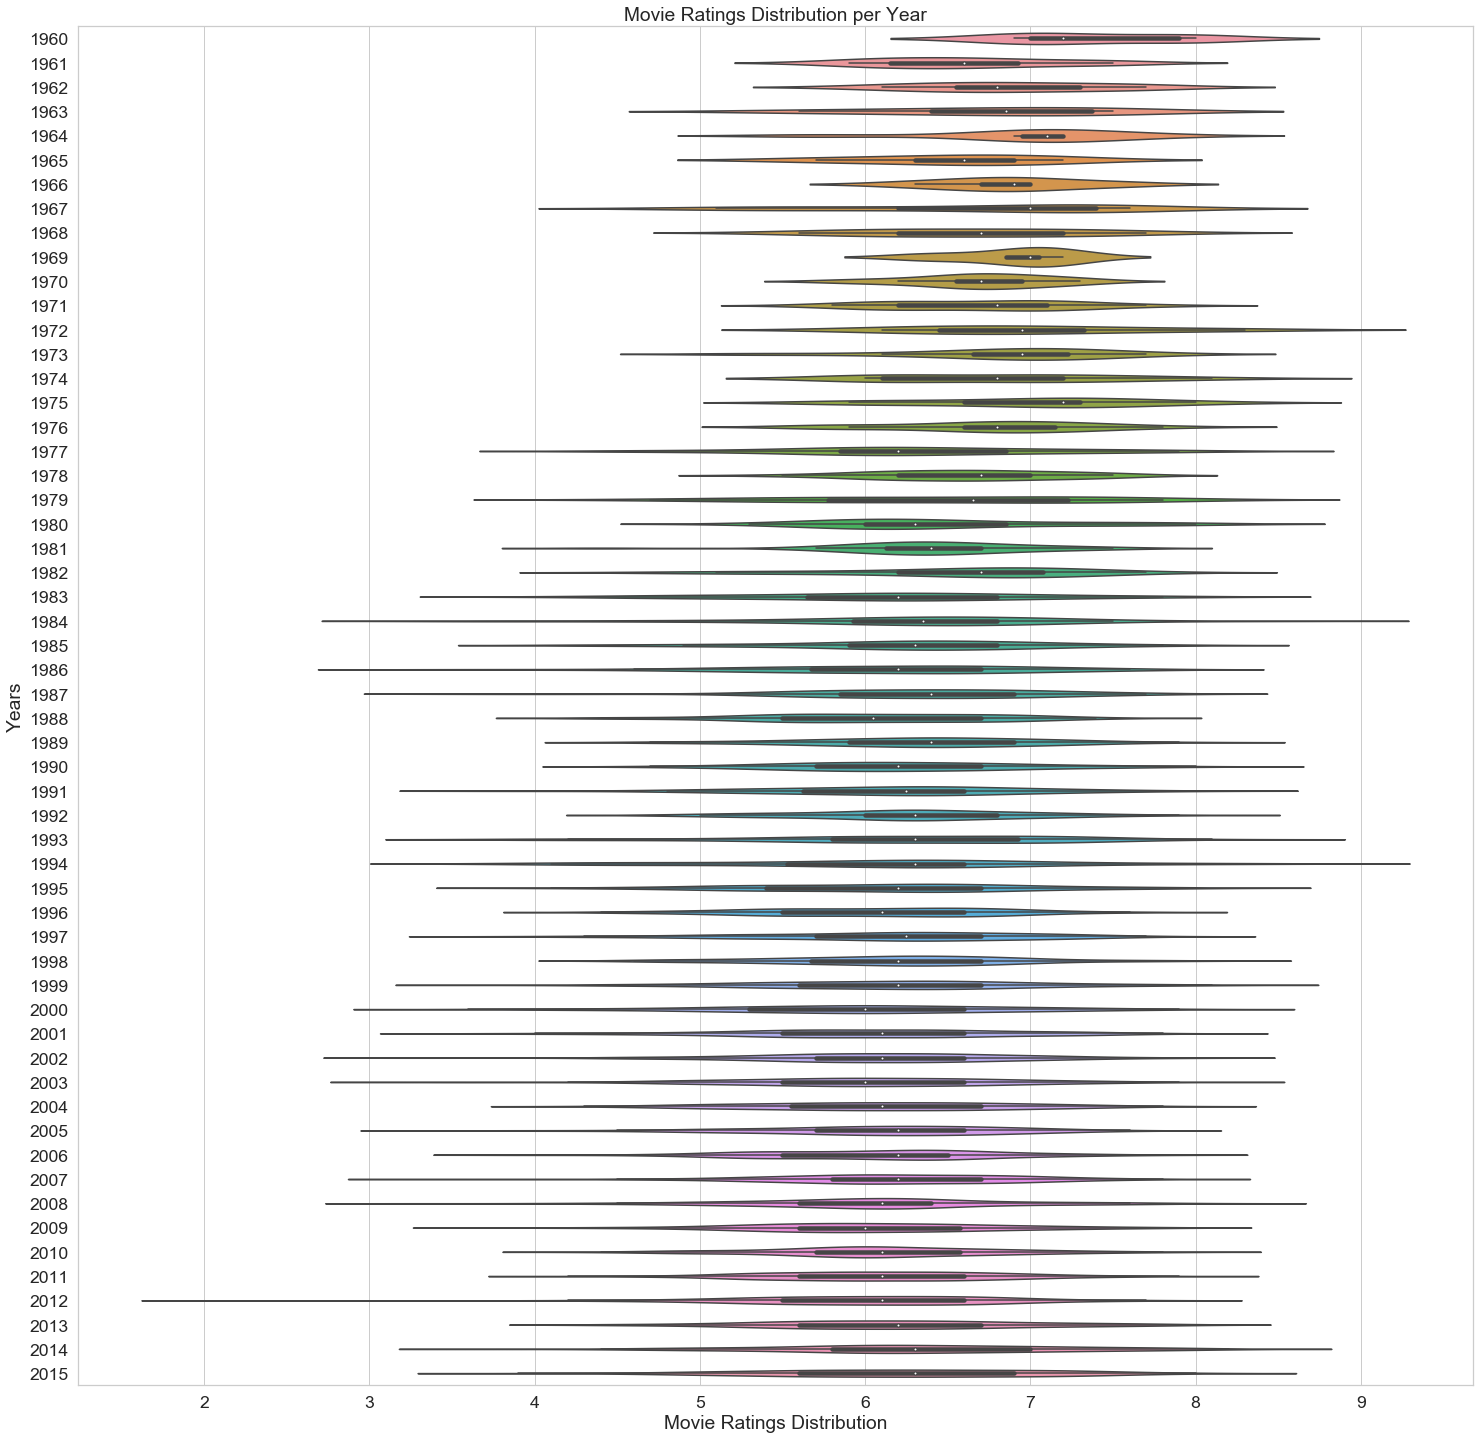

In [1112]:
# previously we saw that the average rating overall was 6.2, we now look at ratings ordered per year
sns.set(rc={'figure.figsize':(25,25)}, font_scale = 1.6)
temp_df = df[['release_year', 'vote_average']]

sns.set_style('whitegrid')
ax = sns.violinplot(x = temp_df.vote_average, y = temp_df.release_year, orient = 'h')

ax.set(xlabel = 'Movie Ratings Distribution', ylabel = 'Years', title = 'Movie Ratings Distribution per Year')
plt.show()

> By looking at average movie ratings distribution per year, we can see that in some years the rating differed, for exmaple in 1969 and 1970. The ratings are more skewed towards the 2000s. 

> **RQ3.3:** What is the relationship between specific features (such as: popularity) and movie ratings?

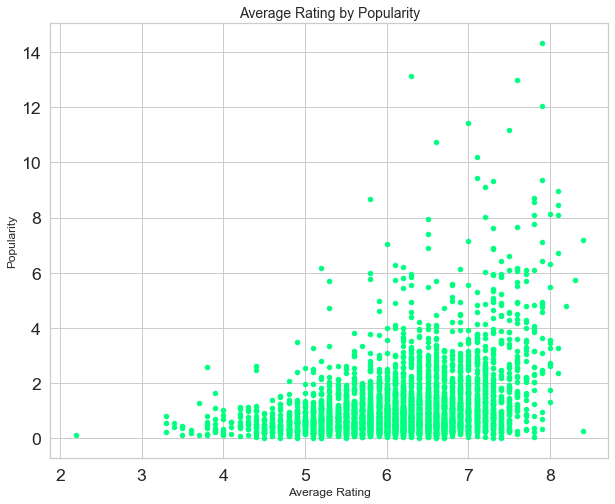

In [1113]:
# create scatter plot for popularity, budget, return on investment, runtime and revenue
# and connect these with the avg. rating to identify possible correlations

# here: by Popularity
df_popul = df.query('popularity <= 16') # added the line to exlcude three outliers
df_popul.plot(y = 'popularity', x = 'vote_average', kind = 'scatter', figsize = (10,8), color = '#00FF80')
plt.title('Average Rating by Popularity', fontsize = '14')
plt.xlabel('Average Rating', fontsize = '12')
plt.ylabel('Popularity', fontsize = '12')
plt.show()

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a weak positive relationship between popularity and average rating

In [1114]:
# calculate the correlation
data_corr = df.corr()
print('Correlation between Popularity and Rating: ', data_corr.loc['popularity', 'vote_average'])

Correlation between Popularity and Rating:  0.3178062738790976


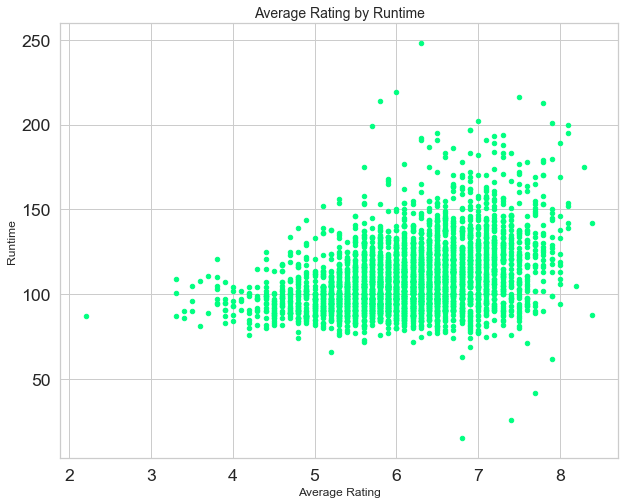

In [1115]:
# here: by Runtime
df_run = df.query('runtime <= 300') # added the line to exlcude one outlier
df_run.plot(y = 'runtime', x = 'vote_average', kind = 'scatter', figsize = (10,8), color = '#00FF80')
plt.title('Average Rating by Runtime', fontsize = '14')
plt.xlabel('Average Rating', fontsize = '12')
plt.ylabel('Runtime', fontsize = '12')
plt.show()

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a rather weak positive relationship between runtime and average rating

In [1116]:
# calculate the correlation
data_corr = df.corr()
print('Correlation between Runtime and Rating: ', data_corr.loc['runtime', 'vote_average'])

Correlation between Runtime and Rating:  0.35211908769012334


In [1117]:
# before we continue with Return on Investment, we first need to calculate the ROI
# create a new column 'roi_success'
# the roi_success is a percentage from revenue in relation budget
df['roi_success'] = (df['revenue'] - df['budget']) / df['budget']

In [1118]:
# check the new dataframe
df.head(3)

,popularity,budget,revenue,profit_loss,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,roi_success
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,9.090192
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,1.522909
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.683984


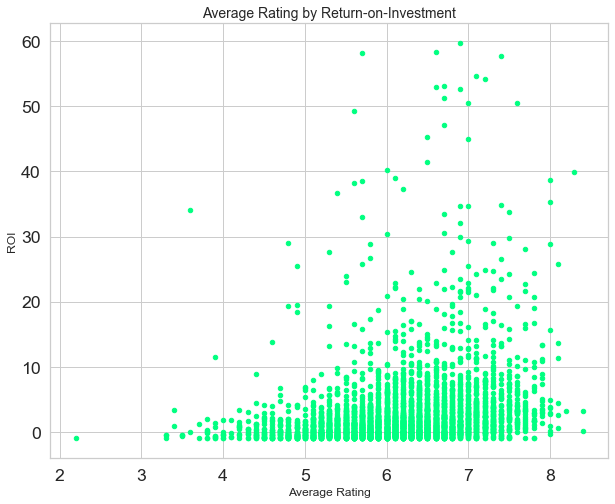

In [1119]:
# here: by ROI
df_roi = df.query('roi_success <= 60') # to exclude outliers and make the chart more readable
df_roi.plot(y = 'roi_success', x = 'vote_average', kind = 'scatter', figsize = (10,8), color = '#00FF80')
plt.title('Average Rating by Return-on-Investment', fontsize = '14')
plt.xlabel('Average Rating', fontsize = '12')
plt.ylabel('ROI', fontsize = '12')
plt.show()

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see no relationship between ROI and average rating

In [1120]:
# calculate the correlation
data_corr = df.corr()
print('Correlation between ROI and Rating: ', data_corr.loc['roi_success', 'vote_average'])

Correlation between ROI and Rating:  -0.007961307616109532


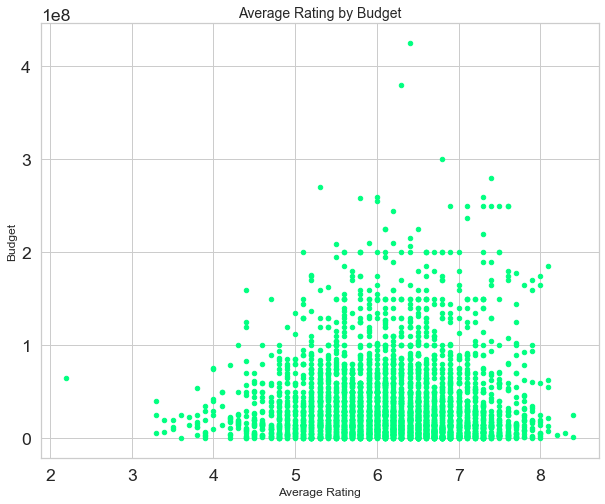

In [1121]:
# here: by Budget
df.plot(y = 'budget', x = 'vote_average', kind = 'scatter', figsize = (10,8), color = '#00FF80')
plt.title('Average Rating by Budget', fontsize = '14')
plt.xlabel('Average Rating', fontsize = '12')
plt.ylabel('Budget', fontsize = '12')
plt.show()

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a weak positive relationship between budget and average rating

In [1122]:
# calculate the correlation
data_corr = df.corr()
print('Correlation between Budget and Rating: ', data_corr.loc['budget', 'vote_average'])

Correlation between Budget and Rating:  0.023729514836354406


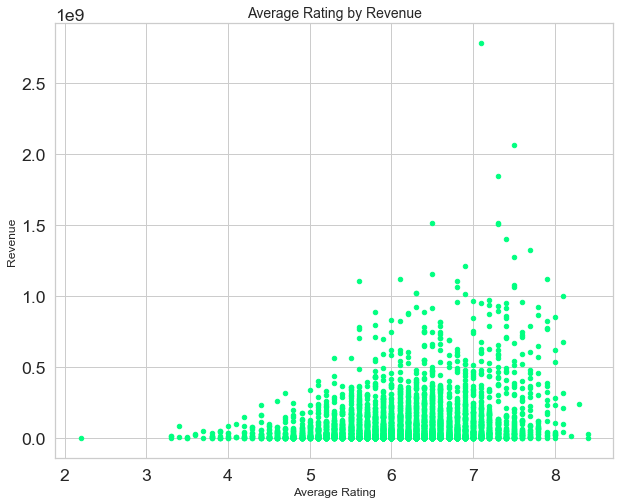

In [1123]:
# here: by Revenue
df.plot(y = 'revenue', x = 'vote_average', kind = 'scatter', figsize = (10,8), color = '#00FF80')
plt.title('Average Rating by Revenue', fontsize = '14')
plt.xlabel('Average Rating', fontsize = '12')
plt.ylabel('Revenue', fontsize = '12')
plt.show()

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a weak positive relationship between revenue and average rating

In [1124]:
# calculate the correlation
data_corr = df.corr()
print('Correlation between Revenue and Rating: ', data_corr.loc['revenue', 'vote_average'])

Correlation between Revenue and Rating:  0.22712177952603338


> **RQ3.4:** Which are the top 15 highest rated movies?

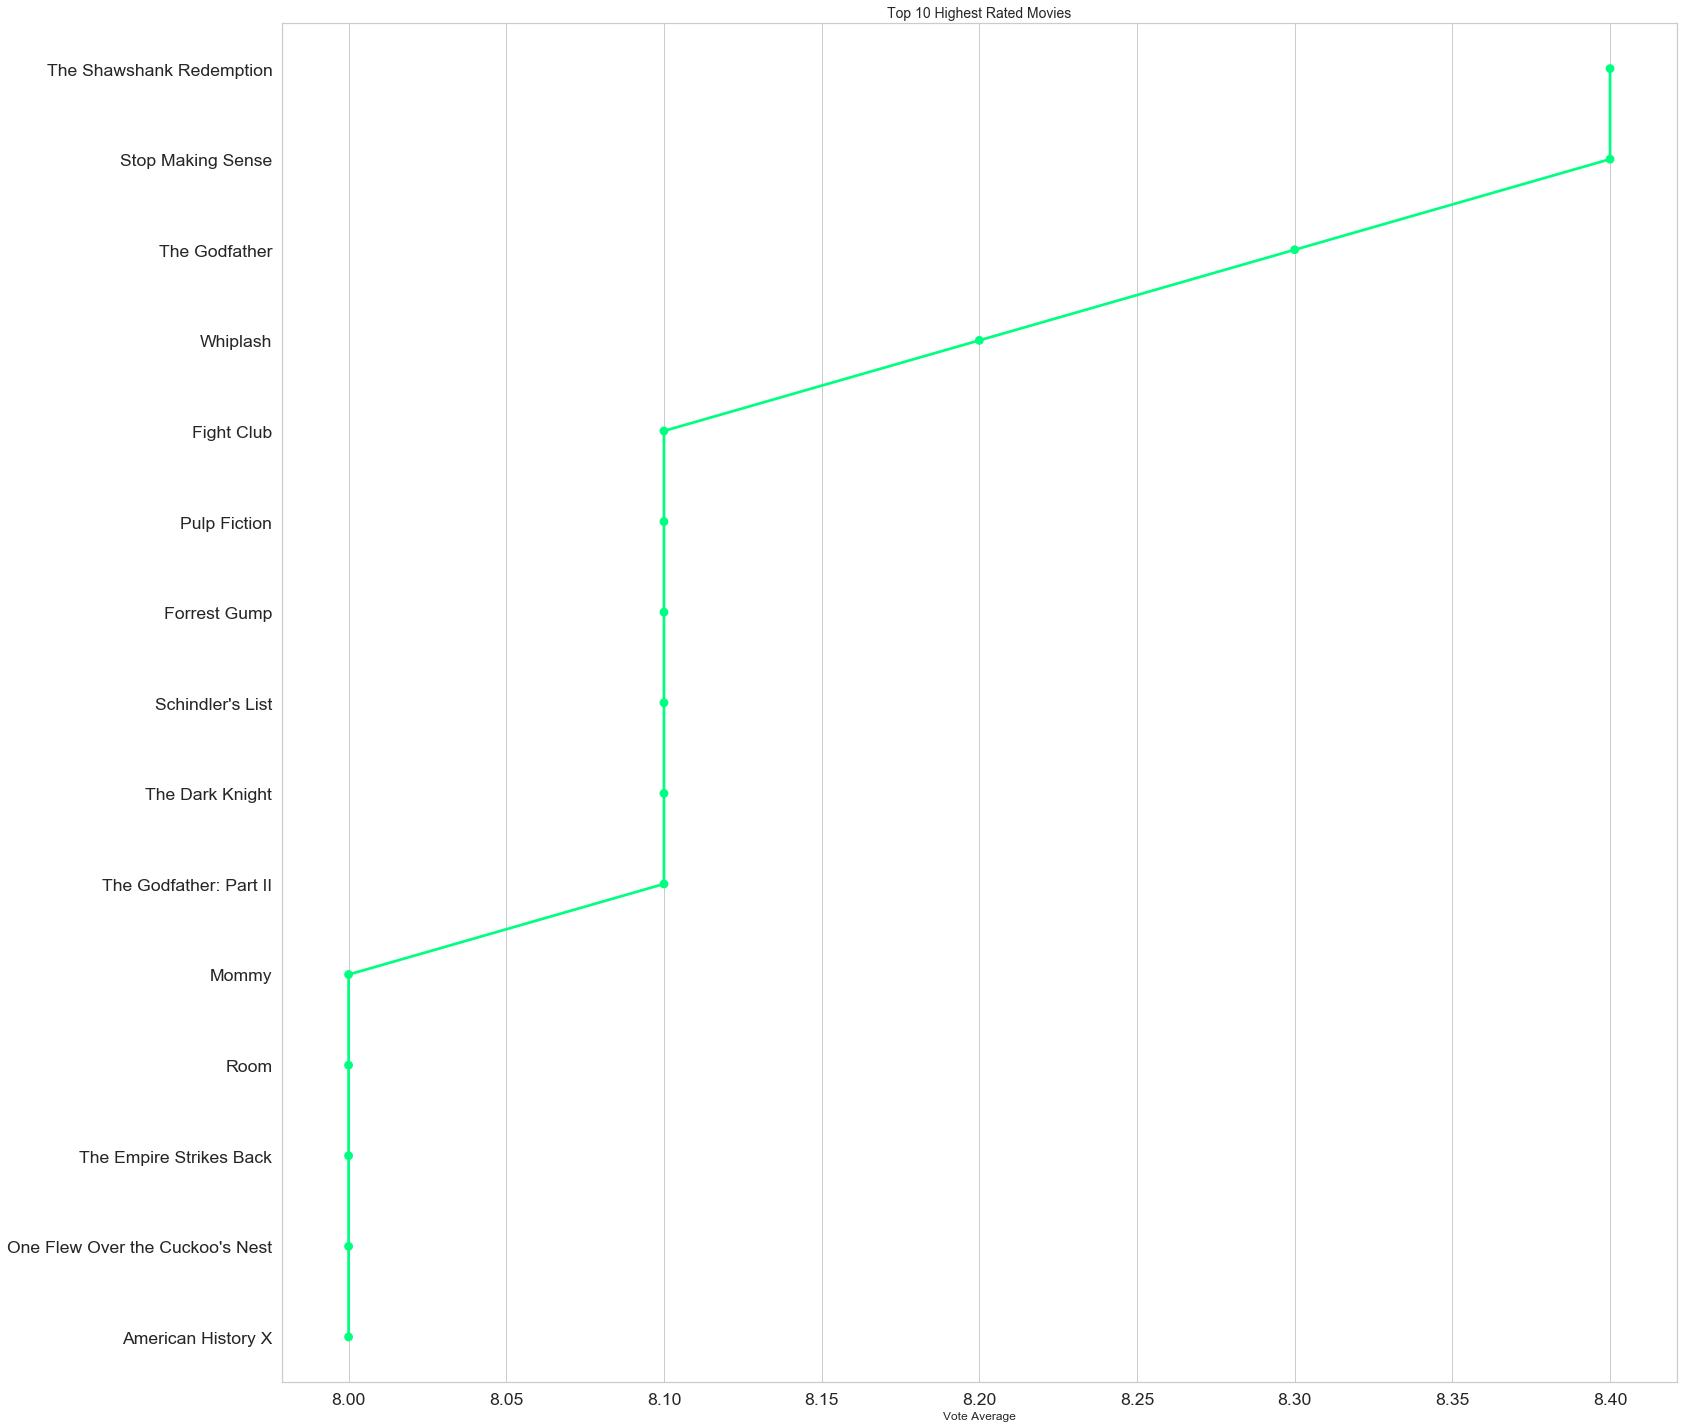

In [1125]:
# sort the 'vote_average' column in descending order and save in new dataframe
data_info = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
data_info['original_title'] = df['original_title']
data = list(map(str,(data_info['original_title'])))

# extract the top 15 high rated movies
x = list(data[:15])
y = list(data_info['vote_average'][:15])

# create the chart and formatting
ax = sns.pointplot(x=y, y=x, color = '#00FF80')
sns.set(rc={'figure.figsize':(8,4)})
ax.set_title('Top 10 Highest Rated Movies', fontsize = '14')
ax.set_xlabel('Vote Average', fontsize = '12')
sns.set_style("whitegrid")

> With this chart we see the top 15 highest rated movies in our dataset. The top three are: The Shawshank Redemption, Stop Making Sense, and The Godfather. None of these are actually within the top three of profit in our previous analysis

<a id='rq4'></a>
### Research Topic IV: Correlation Analysis

> **RQ4.1:** What is the correlation between Budget and Revenue?

Correlation between Revenue and Budget:  0.6884330032018214


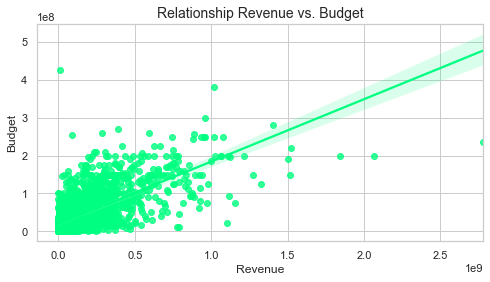

In [1126]:
# revenue change in relation to budget, scatterplot
ax = sns.regplot(x = df['revenue'], y = df['budget'], color = '#00FF80')

# formatting
ax.set_title('Relationship Revenue vs. Budget', fontsize = '14')
ax.set_xlabel('Revenue', fontsize = '12')
ax.set_ylabel('Budget', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# calculate correlation - preparation
df['budget'] = df['budget'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['profit_loss'] = df['profit_loss'].replace(0,np.NAN)

# calculate correlation usind 'corr()' function
data_corr = df.corr()
print('Correlation between Revenue and Budget: ',data_corr.loc['revenue', 'budget'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a strong positive relationship between budget and revenue

> **RQ4.2:** What is the correlation between Budget and Profit?

Correlation between Profit and Budget:  0.5265741358424448


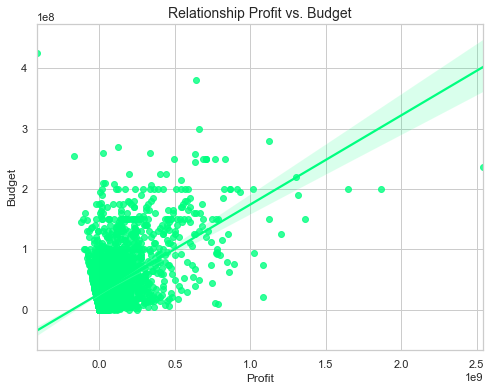

In [1127]:
# profit change in relation to budget, scatterplot
ax = sns.regplot(x = df['profit_loss'], y = df['budget'], color = '#00FF80')

# formatting
ax.set_title('Relationship Profit vs. Budget', fontsize = '14')
ax.set_xlabel('Profit', fontsize = '12')
ax.set_ylabel('Budget', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Profit and Budget: ',data_corr.loc['profit_loss', 'budget'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a strong positive relationship between budget and profit

> **RQ4.3:** What is the correlation between Popularity and Profit?

Correlation between Popularity and Profit:  0.5960191005596198


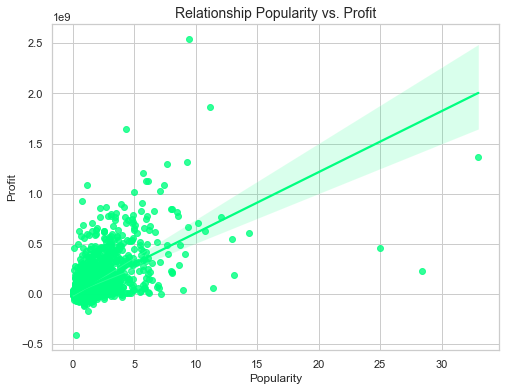

In [1128]:
# popularity change in relation to profit, scatterplot
ax = sns.regplot(x = df['popularity'], y = df['profit_loss'], color = '#00FF80')

# formatting
ax.set_title('Relationship Popularity vs. Profit', fontsize = '14')
ax.set_xlabel('Popularity', fontsize = '12')
ax.set_ylabel('Profit', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Popularity and Profit: ',data_corr.loc['popularity', 'profit_loss'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a strong positive relationship between profit and popularity

> **RQ4.4:** What is the correlation between Runtime Length and Profit?

Correlation between Runtime and Profit:  0.22042644617175755


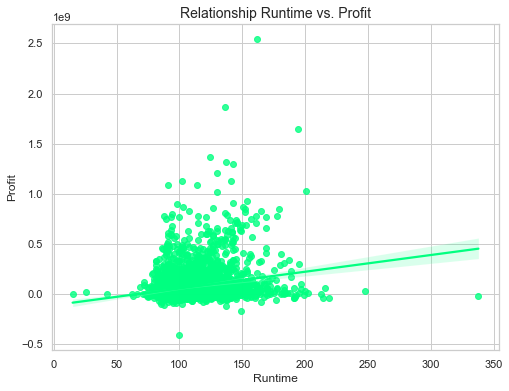

In [1129]:
# runtime change in relation to profit, scatterplot
ax = sns.regplot(x = df['runtime'], y = df['profit_loss'], color = '#00FF80')

# formatting
ax.set_title('Relationship Runtime vs. Profit', fontsize = '14')
ax.set_xlabel('Runtime', fontsize = '12')
ax.set_ylabel('Profit', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Runtime and Profit: ',data_corr.loc['runtime', 'profit_loss'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a weak positive relationship between profit and runtime

> **RQ4.5:** What is the correlation between Popularity and Average Votes?

Correlation between Popularity and Vote Average:  0.3178062738790976


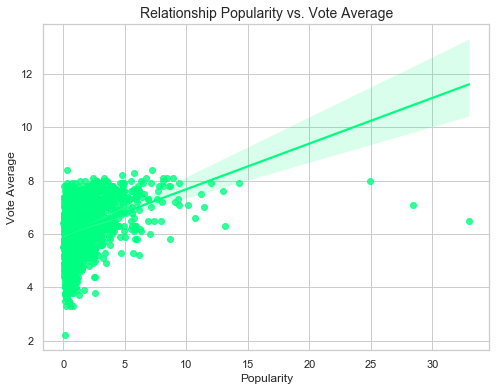

In [1130]:
# popularity in relation to vote_average, scatterplot
ax = sns.regplot(x = df['popularity'], y = df['vote_average'], color = '#00FF80')

# formatting
ax.set_title('Relationship Popularity vs. Vote Average', fontsize = '14')
ax.set_xlabel('Popularity', fontsize = '12')
ax.set_ylabel('Vote Average', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Popularity and Vote Average: ',data_corr.loc['popularity', 'vote_average'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a weak positive relationship between average votes and popularity

> **RQ4.6:** What is the correlation between Budget and Popularity?

Correlation between Budget and Popularity:  0.44664281426783986


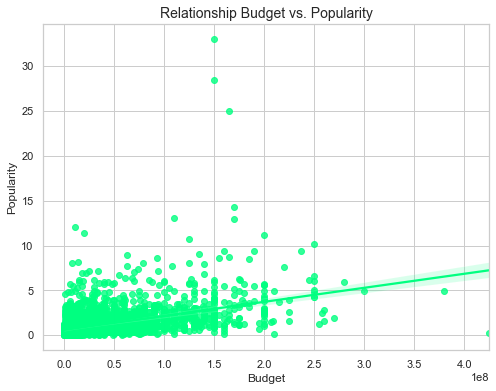

In [1131]:
# budget in relation to popularity, scatterplot
ax = sns.regplot(x = df['budget'], y = df['popularity'], color = '#00FF80')

# formatting
ax.set_title('Relationship Budget vs. Popularity', fontsize = '14')
ax.set_xlabel('Budget', fontsize = '12')
ax.set_ylabel('Popularity', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Budget and Popularity: ',data_corr.loc['budget', 'popularity'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a positive relationship between popularity and budget

> **RQ4.7:** What is the correlation between Budget and Average Votes?

Correlation between Budget and Vote Average:  0.023729514836354406


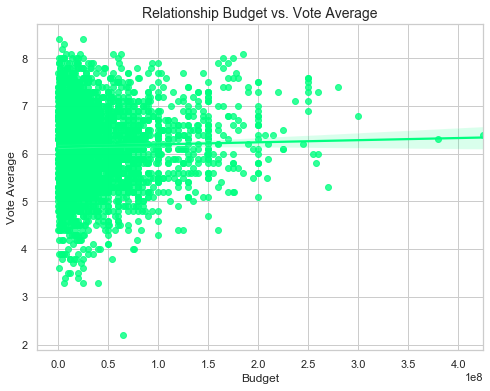

In [1132]:
# budget in relation to vote_average, scatterplot
ax = sns.regplot(x = df['budget'], y = df['vote_average'], color = '#00FF80')

# formatting
ax.set_title('Relationship Budget vs. Vote Average', fontsize = '14')
ax.set_xlabel('Budget', fontsize = '12')
ax.set_ylabel('Vote Average', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Budget and Vote Average: ',data_corr.loc['budget', 'vote_average'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have no relationship between budget and average votes

> **RQ4.8:** What is the correlation between Revenue and Popularity?

Correlation between Revenue and Popularity:  0.6153849128868663


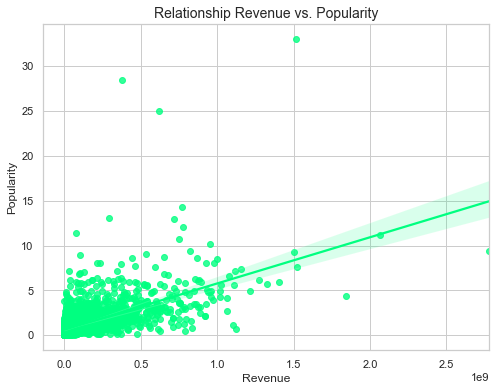

In [1133]:
# revenue in relation to popularity, scatterplot
ax = sns.regplot(x = df['revenue'], y = df['popularity'], color = '#00FF80')

# formatting
ax.set_title('Relationship Revenue vs. Popularity', fontsize = '14')
ax.set_xlabel('Revenue', fontsize = '12')
ax.set_ylabel('Popularity', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Revenue and Popularity: ',data_corr.loc['revenue', 'popularity'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a strong positive relationship between popularity and revenue

> **RQ4.9:** What is the correlation between Revenue and Average Votes?

Correlation between Revenue and Vote Average:  0.22712177952603338


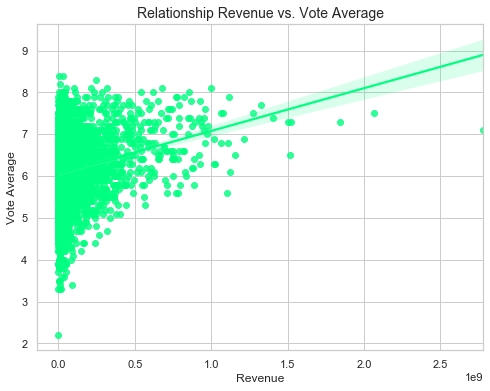

In [1134]:
# revenue in relation to vote_average, scatterplot
ax = sns.regplot(x = df['revenue'], y = df['vote_average'], color = '#00FF80')

# formatting
ax.set_title('Relationship Revenue vs. Vote Average', fontsize = '14')
ax.set_xlabel('Revenue', fontsize = '12')
ax.set_ylabel('Vote Average', fontsize = '12')
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# print
print('Correlation between Revenue and Vote Average: ',data_corr.loc['revenue', 'vote_average'])

> The scatter plot provides insights whether or not there is a relationship between the two analyzed variables. In this case, we can see that we have a weak positive relationship between revenue and average votes

> **RQ4.10:** What are the correlations across multiple variables using Seaborn's pairplot?

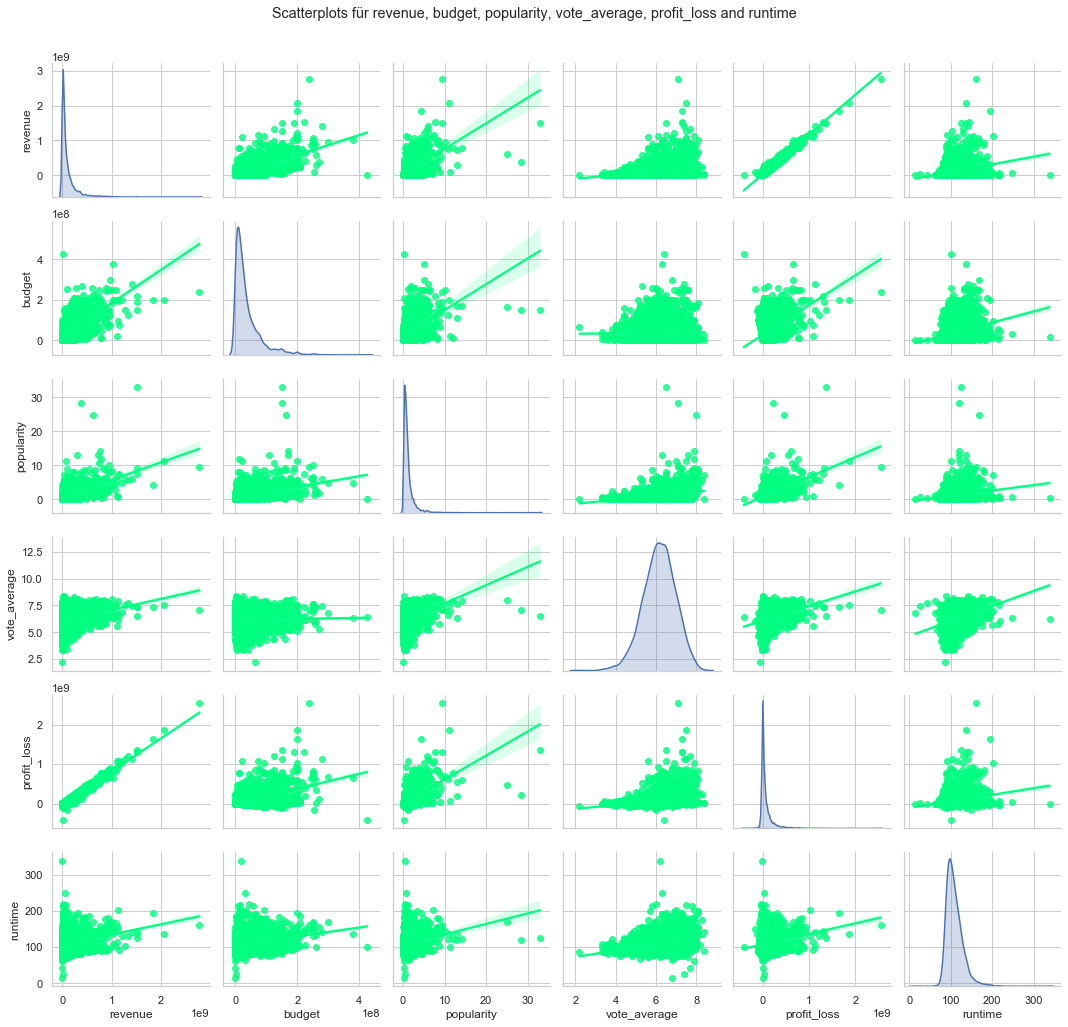

In [1135]:
# next: we apply seaborn's pairplot to see multiple relationships in a single plot
# get the following columns
sea_df = df[['revenue', 'budget', 'popularity', 'vote_average', 'profit_loss', 'runtime']]

f1 = sns.pairplot(sea_df, kind = 'reg', diag_kind = 'kde', plot_kws=dict(color = '#00FF80'), diag_kws = dict(shade = True))
f1.fig.suptitle('Scatterplots für revenue, budget, popularity, vote_average, profit_loss and runtime')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

> The pairplot provides insights into various variables and its relationships to other variables, with a blink of an eye. Further, a distribution is displayed for each variable, giving us an immediate picture whether or not we have a normal distribution. For example: the plot Profit to Revenue shows that all the dots are along the line. This provides us with the insight, that the correlation must be strong positive, close to +1 

> **Visualization:** Correlations in a Heatmap

In [1136]:
# here another visual to show correlations of above variables
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (20,18))
    cmap = sns.diverging_palette(255,128,as_cmap = True)
    _ = sns.heatmap(corr,cmap = cmap,square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True)
    annot_kws = {'fontsize': '12'}

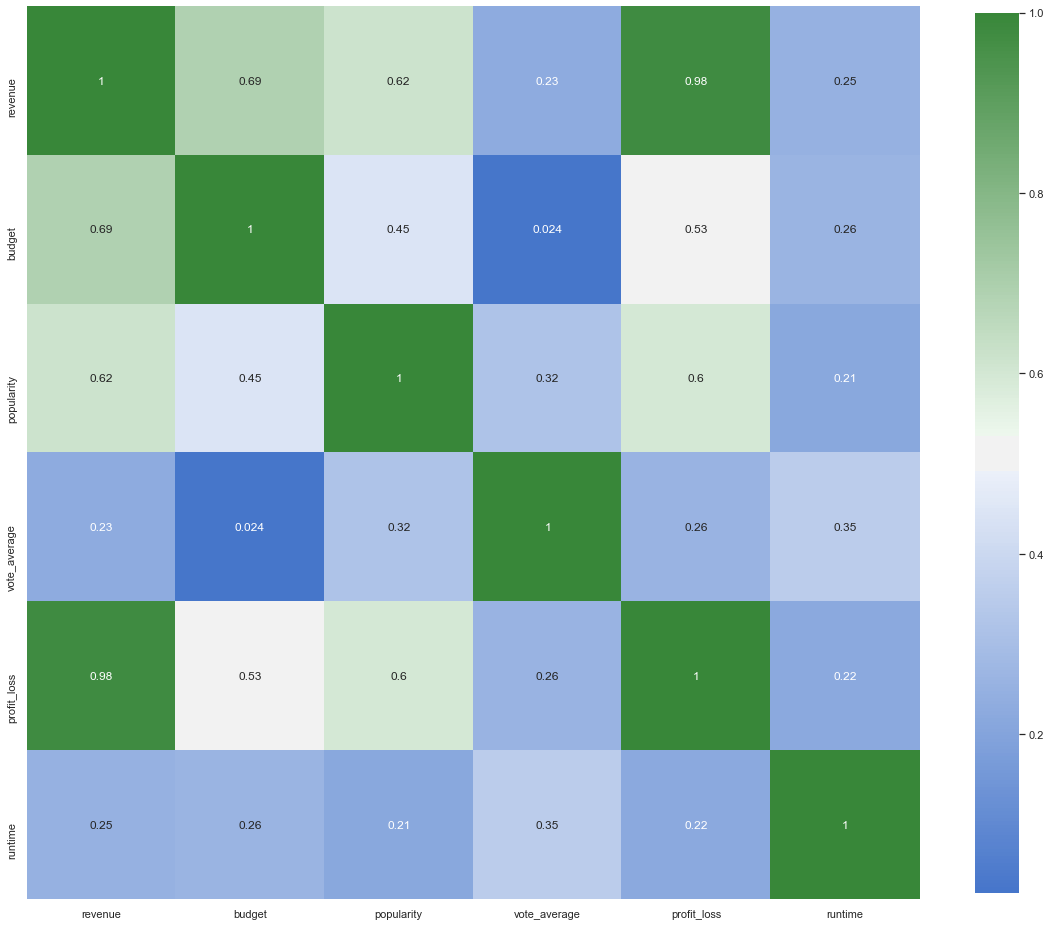

In [1137]:
plot_correlation_map(df[['revenue', 'budget', 'popularity', 'vote_average', 'profit_loss', 'runtime']])

> The heatmap is another form of visualization to see which variables are correlated to each other. For example: Runtime to Revenue shows .25, which suggest that runtime is not related to revenue

<a id='conclusions'></a>
## Conclusions

> The following can be concluded from the analysis:<ul><b> **Top 1 | Profit**:</b> Overall strong growth in profits in the movie industry. Avatar, Star Wars and Titanic are the most profitable movies. The Warriors Way, The Lone Ranger and The Alamo were the least profitable movies. </ul><ul><b> **Top 2 | Genres**:</b> The most successful genres, who are also most profitable are: Comedy, Action, Drama, Adventure and Thriller. These are the top 5. </ul> <ul><b> **Top 3 | Ratings**:</b> Acc. to Pearson coefficient there is a weak positive correlation between: Average rating and popularity as well as runtime.</ul> <ul><b> **Top 4 | Correlation**:</b> Acc. to Pearson coefficient there is a strong positive correlation between: Budget, Popularity, Profit and Revenue</ul>

> **The following are the criteria for a movie to be successful:**<ul>1. Genre must be: Comedy, Action, Drama, Adventure or Thriller.</ul><ul>2. Anyone one of these should be in the cast: Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, or Cameron Diaz</ul><ul>3. Director must be one or more of: Steven Spielberg, Robert Zemeckis, Ridley Scott, Tim Burton, or M. Night Shyamalan</ul><ul>4. The average budget of the movie must be around USD66 million</ul><ul>5. The average runtime of the movie must be around 115 min.</ul><ul>= If the steps are followed, the expected average revenue for a succesfull movie will be around USD296 million</ul>

> **Limitations:**<ul> We cannot be 100 percent sure that a movie will be successful even if following the above guidelines/criteria. But it shows us that we have high probability of making high profits if we had similar characteristics as such. Further, the analysis was done considering the movies which had a significant amount of profit around USD50 million. In addition, it is not clear whether or not the provided data is complete and up-to-date. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. Lastly, the column budget and revenue show no currency unit, which makes the analysis more difficult, as movie budgets and revenues might differ dependent on the country of production and broadcasting.</ul>

## References

> The following resources are used:<ul>Website: seaborn.pydata.org </ul><ul>Website: geeksforgeeks.org </ul> <ul>Portal / Website: Udacity Learning Portal</ul> <ul>Website: python.org</ul><ul>Website: stackoverflow.com</ul>

In [1138]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDb Movie Data Analysis - 2020.ipynb'])

0